In [162]:
import numpy as np
import symforce

symforce.set_backend("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

from symforce import sympy as sm
from symforce import geo
from symforce import typing as T
from symforce.opt.factor import Factor
from symforce.opt.optimizer import Optimizer
from symforce.values import Values

from symforce.opt.barrier_functions import (
    min_max_power_barrier,
    min_max_linear_barrier,
    max_linear_barrier
)

import numpy as np
import matplotlib.pyplot as plt

v:
a_0*t + s_10*t**10 + s_11*t**11 + s_12*t**12 + s_5*t**5 + s_6*t**6 + s_7*t**7 + s_8*t**8 + s_9*t**9 + v_0 + t**2*(-99792*T_A**13*s_12 - 84084*T_A**12*s_11 - 68796*T_A**11*s_10 - 54054*T_A**10*s_9 - 40040*T_A**9*s_8 - 27027*T_A**8*s_7 - 15444*T_A**7*s_6 - 6006*T_A**6*s_5 - 54054*T_A**2*a_0 + 18018*T_A**2*a_A - 216216*T_A*v_0 - 144144*T_A*v_A + 360360*l_A)/(12012*T_A**3) + t**3*(147840*T_A**13*s_12 + 126126*T_A**12*s_11 + 104832*T_A**11*s_10 + 84084*T_A**10*s_9 + 64064*T_A**9*s_8 + 45045*T_A**8*s_7 + 27456*T_A**7*s_6 + 12012*T_A**6*s_5 + 36036*T_A**2*a_0 - 24024*T_A**2*a_A + 192192*T_A*v_0 + 168168*T_A*v_A - 360360*l_A)/(6006*T_A**4) + t**4*(-207900*T_A**13*s_12 - 180180*T_A**12*s_11 - 152880*T_A**11*s_10 - 126126*T_A**10*s_9 - 100100*T_A**9*s_8 - 75075*T_A**8*s_7 - 51480*T_A**7*s_6 - 30030*T_A**6*s_5 - 30030*T_A**2*a_0 + 30030*T_A**2*a_A - 180180*T_A*v_0 - 180180*T_A*v_A + 360360*l_A)/(12012*T_A**5)
a:
a_0 + 10*s_10*t**9 + 11*s_11*t**10 + 12*s_12*t**11 + 5*s_5*t**4 + 6*s_6*t**5 + 7*s

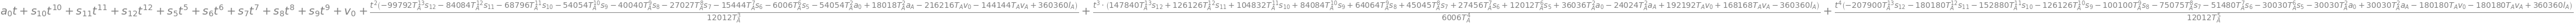

In [163]:
t = sm.Symbol("t")
T_a = sm.Symbol("T_A")
v_0 = sm.Symbol("v_0")
a_0 = sm.Symbol("a_0")
v_A = sm.Symbol("v_A")
a_A = sm.Symbol("a_A")
l_a = sm.Symbol("l_A")

polynomial_order = 12
coeffs = [sm.Symbol("s_{}".format(i)) for i in range(1, polynomial_order+1)]

def velocity_function(current_time):
    v_t = v_0
    for i in range(1, polynomial_order+1):
        v_t = v_t + coeffs[i-1] * current_time**i
    return v_t

def acc_function(current_time):
    tmp = sm.Symbol("tmp")
    return sm.diff(velocity_function(tmp), tmp).subs(tmp, current_time)

eq1 = sm.Eq(velocity_function(0), v_0)
eq2 = sm.Eq(velocity_function(T_a), v_A)
eq3 = sm.Eq(acc_function(0), a_0)
eq4 = sm.Eq(acc_function(T_a), a_A)
tmp = sm.Symbol("tmp")
eq5 = sm.Eq(sm.integrate(velocity_function(tmp), (tmp, 0, T_a)), l_a)

sol = sm.solve([eq1, eq2, eq3, eq4, eq5], coeffs[:4])

def sol_velocity_function_raw(current_time):
    return velocity_function(current_time).subs([(coeffs[0], sol[coeffs[0]]),
                                                 (coeffs[1], sol[coeffs[1]]),
                                                 (coeffs[2], sol[coeffs[2]]),
                                                 (coeffs[3], sol[coeffs[3]]),
                                                 ])

def sol_velocity_function(current_time, arrival_time, initial_v, initial_a, arrival_v, arrival_a, drive_length):
    return sol_velocity_function_raw(current_time).subs([
        (v_0, initial_v),
        (a_0, initial_a),
        (v_A, arrival_v),
        (a_A, arrival_a),
        (T_a, arrival_time),
        (l_a, drive_length)
    ])

print("v:")
print(sol_velocity_function_raw(t))

print("a:")
print(sm.diff(sol_velocity_function_raw(t), t))

sol_velocity_function_raw(t)

In [164]:
def velocity_function(t: T.Scalar,
                      v_0: T.Scalar,
                      a_0: T.Scalar,
                      v_A: T.Scalar,
                      a_A: T.Scalar,
                      T_A: T.Scalar,
                      l_A: T.Scalar,
                      s_5: T.Scalar,
                      s_6: T.Scalar,
                      s_7: T.Scalar,
                      s_8: T.Scalar,
                      s_9: T.Scalar,
                      s_10: T.Scalar,
                      s_11: T.Scalar,
                      s_12: T.Scalar) -> T.Scalar :
    return a_0*t + s_10*t**10 + s_11*t**11 + s_12*t**12 + s_5*t**5 + s_6*t**6 + s_7*t**7 + s_8*t**8 + s_9*t**9 + v_0 + t**2*(-99792*T_A**13*s_12 - 84084*T_A**12*s_11 - 68796*T_A**11*s_10 - 54054*T_A**10*s_9 - 40040*T_A**9*s_8 - 27027*T_A**8*s_7 - 15444*T_A**7*s_6 - 6006*T_A**6*s_5 - 54054*T_A**2*a_0 + 18018*T_A**2*a_A - 216216*T_A*v_0 - 144144*T_A*v_A + 360360*l_A)/(12012*T_A**3) + t**3*(147840*T_A**13*s_12 + 126126*T_A**12*s_11 + 104832*T_A**11*s_10 + 84084*T_A**10*s_9 + 64064*T_A**9*s_8 + 45045*T_A**8*s_7 + 27456*T_A**7*s_6 + 12012*T_A**6*s_5 + 36036*T_A**2*a_0 - 24024*T_A**2*a_A + 192192*T_A*v_0 + 168168*T_A*v_A - 360360*l_A)/(6006*T_A**4) + t**4*(-207900*T_A**13*s_12 - 180180*T_A**12*s_11 - 152880*T_A**11*s_10 - 126126*T_A**10*s_9 - 100100*T_A**9*s_8 - 75075*T_A**8*s_7 - 51480*T_A**7*s_6 - 30030*T_A**6*s_5 - 30030*T_A**2*a_0 + 30030*T_A**2*a_A - 180180*T_A*v_0 - 180180*T_A*v_A + 360360*l_A)/(12012*T_A**5)

def acc_function(t: T.Scalar,
                      v_0: T.Scalar,
                      a_0: T.Scalar,
                      v_A: T.Scalar,
                      a_A: T.Scalar,
                      T_A: T.Scalar,
                      l_A: T.Scalar,
                      s_5: T.Scalar,
                      s_6: T.Scalar,
                      s_7: T.Scalar,
                      s_8: T.Scalar,
                      s_9: T.Scalar,
                      s_10: T.Scalar,
                      s_11: T.Scalar,
                      s_12: T.Scalar) -> T.Scalar :
    return a_0 + 10*s_10*t**9 + 11*s_11*t**10 + 12*s_12*t**11 + 5*s_5*t**4 + 6*s_6*t**5 + 7*s_7*t**6 + 8*s_8*t**7 + 9*s_9*t**8 + t*(-99792*T_A**13*s_12 - 84084*T_A**12*s_11 - 68796*T_A**11*s_10 - 54054*T_A**10*s_9 - 40040*T_A**9*s_8 - 27027*T_A**8*s_7 - 15444*T_A**7*s_6 - 6006*T_A**6*s_5 - 54054*T_A**2*a_0 + 18018*T_A**2*a_A - 216216*T_A*v_0 - 144144*T_A*v_A + 360360*l_A)/(6006*T_A**3) + t**2*(147840*T_A**13*s_12 + 126126*T_A**12*s_11 + 104832*T_A**11*s_10 + 84084*T_A**10*s_9 + 64064*T_A**9*s_8 + 45045*T_A**8*s_7 + 27456*T_A**7*s_6 + 12012*T_A**6*s_5 + 36036*T_A**2*a_0 - 24024*T_A**2*a_A + 192192*T_A*v_0 + 168168*T_A*v_A - 360360*l_A)/(2002*T_A**4) + t**3*(-207900*T_A**13*s_12 - 180180*T_A**12*s_11 - 152880*T_A**11*s_10 - 126126*T_A**10*s_9 - 100100*T_A**9*s_8 - 75075*T_A**8*s_7 - 51480*T_A**7*s_6 - 30030*T_A**6*s_5 - 30030*T_A**2*a_0 + 30030*T_A**2*a_A - 180180*T_A*v_0 - 180180*T_A*v_A + 360360*l_A)/(3003*T_A**5)


In [165]:
initial_speed = 0.5
initial_a = -0.05 * 9.8
arrival_speed = 0
arrival_a = -0.05 * 9.8
drive_length = 20
arrival_time = 30
sample_interval_time = 1

def velocity_min_max_residual(t: T.Scalar,
                              v_0: T.Scalar,
                              a_0: T.Scalar,
                              v_A: T.Scalar,
                              a_A: T.Scalar,
                              T_A: T.Scalar,
                              l_A: T.Scalar,
                              s_5: T.Scalar,
                              s_6: T.Scalar,
                              s_7: T.Scalar,
                              s_8: T.Scalar,
                              s_9: T.Scalar,
                              s_10: T.Scalar,
                              s_11: T.Scalar,
                              s_12: T.Scalar) -> geo.V1 :
    return geo.V1(
        min_max_linear_barrier(velocity_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6, s_7, s_8, s_9, s_10, s_11, s_12), 0, v_0, 100, 0.1)
    )

def acc_residual(t: T.Scalar,
                 v_0: T.Scalar,
                 a_0: T.Scalar,
                 v_A: T.Scalar,
                 a_A: T.Scalar,
                 T_A: T.Scalar,
                 l_A: T.Scalar,
                 s_5: T.Scalar,
                 s_6: T.Scalar,
                 s_7: T.Scalar,
                 s_8: T.Scalar,
                 s_9: T.Scalar,
                 s_10: T.Scalar,
                 s_11: T.Scalar,
                 s_12: T.Scalar) -> geo.V1 :
    return geo.V1(
        # max_linear_barrier(acc_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6, s_7, s_8, s_9, s_10, s_11, s_12), 0, 100, 0.1)
        # acc_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6, s_7, s_8, s_9, s_10, s_11, s_12)**2
        min_max_linear_barrier(acc_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6, s_7, s_8, s_9, s_10, s_11, s_12), arrival_a, -arrival_a, 1000, 0.1)
    )


In [166]:
factors = []



num_constraint = arrival_time // sample_interval_time
for i in range(num_constraint):
    factors.append(
        Factor(
            # residual=velocity_min_max_residual,
            residual=acc_residual,
            keys=["times[{}]".format(i),
                  "v_0", "a_0",
                  "v_A", "a_A",
                  "T_A", "l_A", "s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12"],
        )
    )

    factors.append(
        Factor(
            residual=velocity_min_max_residual,
            # residual=acc_residual,
            keys=["times[{}]".format(i),
                  "v_0", "a_0",
                  "v_A", "a_A",
                  "T_A", "l_A", "s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12"],
        )
    )

In [167]:
optimizer = Optimizer(
    factors=factors,
    optimized_keys=["s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12"],
    debug_stats=True,
)

In [168]:
# initial_speed = 1.8
# initial_a = -0.05 * 9.8
# arrival_speed = 0
# arrival_a = -0.05 * 9.8
# drive_length = 20
# arrival_time = 30



initial_values = Values(
    times = list(np.linspace(1, arrival_time-1, num_constraint)),
    v_0 = initial_speed,
    a_0 = initial_a,
    v_A = arrival_speed,
    a_A = arrival_a,
    T_A = arrival_time,
    l_A = drive_length,
    s_5 = 10,
    s_6 = 1,
    s_7 = 2,
    s_8 = 3,
    s_9 = 4,
    s_10 = 5,
    s_11 = 6,
    s_12 = 10
)

result = optimizer.optimize(initial_values)
print(result)

Optimizer.Result(initial_values=Values(
  times: [1.0, 1.9655172413793105, 2.931034482758621, 3.896551724137931, 4.862068965517242, 5.827586206896552, 6.793103448275862, 7.758620689655173, 8.724137931034484, 9.689655172413794, 10.655172413793103, 11.620689655172415, 12.586206896551724, 13.551724137931036, 14.517241379310345, 15.482758620689657, 16.448275862068968, 17.413793103448278, 18.379310344827587, 19.344827586206897, 20.310344827586206, 21.27586206896552, 22.24137931034483, 23.20689655172414, 24.17241379310345, 25.137931034482758, 26.10344827586207, 27.06896551724138, 28.03448275862069, 29.0],
  v_0: 0.5,
  a_0: -0.49000000000000005,
  v_A: 0,
  a_A: -0.49000000000000005,
  T_A: 30,
  l_A: 20,
  s_5: 10,
  s_6: 1,
  s_7: 2,
  s_8: 3,
  s_9: 4,
  s_10: 5,
  s_11: 6,
  s_12: 10,
), optimized_values=Values(
  times: [1.0, 1.9655172413793105, 2.931034482758621, 3.896551724137931, 4.862068965517242, 5.827586206896552, 6.793103448275862, 7.758620689655173, 8.724137931034484, 9.68965517

[1.0, 1.9655172413793105, 2.931034482758621, 3.896551724137931, 4.862068965517242, 5.827586206896552, 6.793103448275862, 7.758620689655173, 8.724137931034484, 9.689655172413794, 10.655172413793103, 11.620689655172415, 12.586206896551724, 13.551724137931036, 14.517241379310345, 15.482758620689657, 16.448275862068968, 17.413793103448278, 18.379310344827587, 19.344827586206897, 20.310344827586206, 21.27586206896552, 22.24137931034483, 23.20689655172414, 24.17241379310345, 25.137931034482758, 26.10344827586207, 27.06896551724138, 28.03448275862069, 29.0]


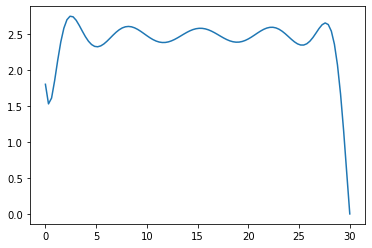

In [169]:
opt_s_5  = result.optimized_values["s_5"]
opt_s_6 = result.optimized_values["s_6"]
opt_s_7  = result.optimized_values["s_7"]
opt_s_8 = result.optimized_values["s_8"]
opt_s_9  = result.optimized_values["s_9"]
opt_s_10 = result.optimized_values["s_10"]
opt_s_11  = result.optimized_values["s_11"]
opt_s_12 = result.optimized_values["s_12"]

opt_t = np.linspace(0, arrival_time, 100)
opt_v = [3600/1000 * velocity_function(c_t, initial_speed, initial_a, arrival_speed, arrival_a, arrival_time, drive_length, opt_s_5, opt_s_6, opt_s_7, opt_s_8, opt_s_9, opt_s_10, opt_s_11, opt_s_12) for c_t in opt_t]

# plt.ylim([0, initial_speed])
plt.plot(opt_t, opt_v)
print(list(np.linspace(1, arrival_time-1, num_constraint)))